In [1]:
"""import self-written function and classes"""
from generator import to_byte_pair,generate
from n_gram import N_gram
from utility_functions import get_top_bigrams,get_words
from utility_functions import generate_n_grams
from BPE_function import bpe,get_best_merges


In [2]:
"""load Shakespeare text (train,validation,test) that is converted into byte pairs (computed from bpe task)"""
with open (r"corpora/Shakespeare_byte.txt", 'r') as f:
  n_gram_corps_train = eval(f.read())
with open (r"corpora/Shakespeare_byte_valid.txt", 'r') as f:
  n_gram_corps_valid = eval(f.read())
with open (r"corpora/Shakespeare_byte_test.txt", 'r') as f:
  n_gram_corps_test = eval(f.read())
with open (r"corpora/vocab_train.txt", 'r') as f:
  vocab_train = eval(f.read())

with open (r"corpora/Shakespeare_clean_train.txt", 'r') as f:
  text_train = f.read()
with open (r"corpora/Shakespeare_clean_valid.txt", 'r') as f:
  text_valid = f.read()
with open (r"corpora/Shakespeare_clean_test.txt", 'r') as f:
  text_test = f.read()


In [3]:
with open (r"corpora/Shakespeare_clean_valid.txt", 'r') as f:
  text_valid = f.read()
  
dict_train = get_words(text_train)
dict_valid = get_words(text_valid)
dict_test = get_words(text_test)

best_k,best_perplexity,best_n_gram,second_best_k,second_best_perplexity,second_best_n_gram,third_best_k,third_best_perplexity,third_best_n_gram,ks,n_gram_num,perplexities = get_best_merges(dict_train,text_train,dict_valid,text_valid,1000,100)
result = ["best k:",best_k,"best n gram", best_n_gram,"best k perplexity:",best_perplexity,"2nd best k:",second_best_k,"2nd best n gram", second_best_n_gram,"2nd best k perplexity:",second_best_perplexity,"3rd best k:",third_best_k,"3rd best n gram",third_best_n_gram,"3rd best k perplexity:",third_best_perplexity]
with open("k_merges_n_gram.txt", "w") as k_merges_n_gram:
  for item in result:
     k_merges_n_gram.write(f"{item}\n")



N-gram split for 1-gram, k = 100: [['the_'], ['t'], ['ra'], ['g'], ['e'], ['d'], ['y_'], ['of_'], ['an'], ['t']]
Old perplexity: 100000000.00106137
Perplexity: 95.83
N-gram split for 2-gram, k = 100: [['the_', 't'], ['t', 'ra'], ['ra', 'g'], ['g', 'e'], ['e', 'd'], ['d', 'y_'], ['y_', 'of_'], ['of_', 'an'], ['an', 't'], ['t', 'on']]
Old perplexity: 31.041010729441577
Perplexity: 30.48
N-gram split for 3-gram, k = 100: [['the_', 't', 'ra'], ['t', 'ra', 'g'], ['ra', 'g', 'e'], ['g', 'e', 'd'], ['e', 'd', 'y_'], ['d', 'y_', 'of_'], ['y_', 'of_', 'an'], ['of_', 'an', 't'], ['an', 't', 'on'], ['t', 'on', 'y_']]
Old perplexity: 53.91956844747087
Perplexity: 26.83
N-gram split for 4-gram, k = 100: [['the_', 't', 'ra', 'g'], ['t', 'ra', 'g', 'e'], ['ra', 'g', 'e', 'd'], ['g', 'e', 'd', 'y_'], ['e', 'd', 'y_', 'of_'], ['d', 'y_', 'of_', 'an'], ['y_', 'of_', 'an', 't'], ['of_', 'an', 't', 'on'], ['an', 't', 'on', 'y_'], ['t', 'on', 'y_', 'and_']]
Old perplexity: 1655.7131932966815
Perplexity: 79

<class 'numpy.ndarray'>
(1, 36) (1, 36) (1, 36)


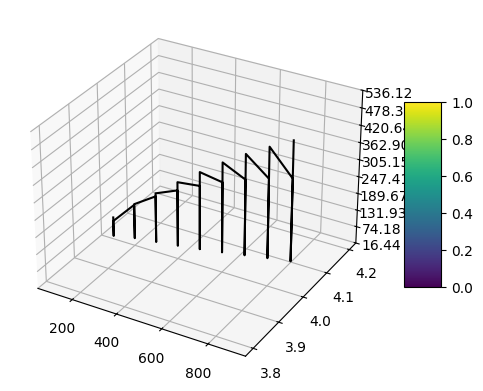

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.array(ks)
Y = np.array(n_gram_num)
Z = np.array(perplexities)
#Z = np.reshape(Z, (-1, 2))

print(type(X))

X, Y = np.meshgrid(X, Y)  # Make X and Y 2D
Z = Z.reshape(Y.shape[0], X.shape[1])

print(X.shape, Y.shape, Z.shape)  # Should all be (len(n_gram_num), len(ks))

# Plot the surface.
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       #linewidth=1, antialiased=True, edgecolor='k')
wire = ax.plot_wireframe(X, Y, Z, color='black')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(wire, shrink=0.5, aspect=5)

plt.show()


import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [4]:

with open("k_merges_n_gram.txt", "r") as f:
    k_merges_n_gram = f.read().splitlines()


vocab_train_best_k,_,_ = bpe(dict_train,best_k)
text = to_byte_pair(text_train, vocab_train_best_k)

with open("Shakespeare_best_merge_train", "a") as Shakespeare_best_merge_train:
  Shakespeare_best_merge_train.write(str(text))

vocab_train_2nd_best_k,_,_ = bpe(dict_train,second_best_k)
text = to_byte_pair(text_train, vocab_train_2nd_best_k)

with open("Shakespeare_2nd_best_merge_train.txt", "a") as Shakespeare_2nd_best_merge_train:
  Shakespeare_2nd_best_merge_train.write(str(text))

vocab_train_3rd_best_k,_,_ = bpe(dict_train,third_best_k)
text = to_byte_pair(text_train, vocab_train_3rd_best_k)

with open("Shakespeare_3rd_best_merge_train.txt", "a") as Shakespeare_3rd_best_merge_train:
  Shakespeare_3rd_best_merge_train.write(str(text))

text = to_byte_pair(text_valid, vocab_train_best_k)

with open("Shakespeare_best_merge_valid", "a") as Shakespeare_best_merge_valid:
  Shakespeare_best_merge_valid.write(str(text))

text = to_byte_pair(text_valid, vocab_train_2nd_best_k)

with open("Shakespeare_2nd_best_merge_valid.txt", "a") as Shakespeare_2nd_best_merge_valid:
  Shakespeare_2nd_best_merge_valid.write(str(text))

text = to_byte_pair(text_valid,vocab_train_3rd_best_k)

with open("Shakespeare_3rd_best_merge_valid.txt", "a") as Shakespeare_3rd_best_merge_valid:
  Shakespeare_3rd_best_merge_valid.write(str(text))

text = to_byte_pair(text_test, vocab_train_best_k)

with open("Shakespeare_best_merge_test", "a") as Shakespeare_best_merge_test:
  Shakespeare_best_merge_test.write(str(text))

text = to_byte_pair(text_test, vocab_train_2nd_best_k)

with open("Shakespeare_2nd_best_merge_test.txt", "a") as Shakespeare_2nd_best_merge_test:
  Shakespeare_2nd_best_merge_test.write(str(text))

text = to_byte_pair(text_test, vocab_train_3rd_best_k)

with open("Shakespeare_3rd_best_merge_test.txt", "a") as Shakespeare_3rd_best_merge_test:
  Shakespeare_3rd_best_merge_test.write(str(text))


In [9]:
our_n_grams = generate_n_grams(n_gram_corps_train,4, len(vocab_train))

for n_gram in our_n_grams:
    # print(f"N-gram split: {n_gram.split_text[:10]}")
    print("Ngram of order: ", n_gram.ndim)
    perplexity = n_gram.perplexity(n_gram_corps_test)

Ngram of order:  1
Perplexity: 614.95
Ngram of order:  2
Perplexity: 316.49
Ngram of order:  3
Perplexity: 954.44
Ngram of order:  4
Perplexity: 871.22


In [6]:
n_list = [our_n_grams[0].n_gram_probs, our_n_grams[1].n_gram_probs]

text = generate("cleopatra is my", n_list, 2, vocab_train)
print(text)

cleopatra is my meantime frame report . 


In [7]:
n_list = [our_n_grams[0].n_gram_probs, our_n_grams[1].n_gram_probs,our_n_grams[2].n_gram_probs]

text = generate("cleopatra is my", n_list, 2, vocab_train)
print(text)

cleopatra is my errank'd her part with cunning fainth your prise upon't , there lies a touch of animalefest bers what they play treachequantique she looks with unrush it nothing or of accurvy to sufferflying infinite of it an indian arm'd a sudden sending to conceive you may we love take , how goes slow from what fair and treasure an to one thing . 


In [8]:
n_list = [our_n_grams[0].n_gram_probs, our_n_grams[1].n_gram_probs,our_n_grams[2].n_gram_probs,our_n_grams[3].n_gram_probs]

text = generate("cleopatra is my", n_list, 2, vocab_train)
print(text)

cleopatra is my tongue ,-cupidius o ; 
